# NLP and the Web

## Task 0 ~ 0P

__Task 0 is only relevant for the homework.__

##### a) Please enter your group number

14


_**Regarding types, documentation, and output:**_

_We tried to make the description of the parameters as clear as possible. However, if you believe that something is missing, please reach out to us in Moodle. We provide type hints for the function parameters and return values of the functions that you have to implement._

_Nevertheless, your code must use the provided method stubs and parameters. Furthermore, make sure that your code runs without errors and in a reasonable amount of time, for example by using "Kernel/Restart & Run All" before submitting._

_Please use comments where appropriate to help the tutors understand your code. This is especially important for the more extensive exercises later on. Finally, please pay attention to how you output the results. We highly recommend using `display(df)` for displaying data frames._

_**Please only modify the template in the specified markdown and code cells (e.g. YOUR CODE / ANSWER / IMPORTS HERE). Some cells are left blank on purpose. Please do not modify these cells, because they are used to autograde your submission. If these cells are modified, the automatic grading for your submission will fail and we might deduct points. Please do not modify the cells containing public and private tests. If you want to do your own tests, please use the code cell containing your code solution (YOUR CODE HERE).**_

---

# Home Exercise 4

In [2]:
from typing import Mapping
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import numpy.typing as npt
from typing import Tuple, List
import collections
import random
import seaborn as sns
sns.set()

from sklearn.metrics import f1_score
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering

## Task 1: PageRank Algorithm (12 Points)

In this task, you will implement and execute the [PageRank algorithm](https://en.wikipedia.org/wiki/PageRank).

__About the data__:

The data for this task is stored in `page_links.csv` and comprises links between 15 webpages (with ids from 0 to 14).,Each row represents a link from the webpage with the id in the `source` column to the webpage with the id in the `destination` column.

### Computing the Matrices (5.5 Points)

In [3]:
# Whenever you are asked to output a matrix, use this function.
def print_matrix(matrix: np.ndarray, leave_out_zeros: bool = False) -> None:
    """
    Print the given matrix.
    
    :param matrix: matrix to print
    :param leave_out_zeros: whether to leave out zeros
    """
    
    def stringify_number(num: float) -> str:
        rounded_num: float = round(num, 2)
        if leave_out_zeros and rounded_num == 0:
            return " "
        else:
            return str(rounded_num)
    
    string_values: list = [[stringify_number(e) for e in row] for row in matrix]
    lens: list = [max(map(len, col)) for col in zip(*string_values)]
    fmt: str = " ".join("{{:{}}}".format(x) for x in lens)
    print("\n".join([fmt.format(*row) for row in string_values]))

matrix = np.array([[1.234, 5.678, 0.0], [1,2,3], [2.222, 3.333, 4.444]])
print_matrix(matrix)

1.23 5.68 0.0 
1.0  2.0  3.0 
2.22 3.33 4.44


__a) Implement the function `compute_link_matrix(...)`, which computes the link matrix $m$. The value of $m_{i,j}=0$ if no link from $i$ to $j$ exists and $m_{i,j}=1$ if such a link exists. Load the data and execute the function on it. Display the resulting link matrix using `print_matrix(...)`.__

The data is in the following format:
Each row contains two integer: the source and destination of a link.

__Hint:__ You can assume that the webpage ids range from 0 to `num_pages` - 1. (1P)

In [4]:
def compute_link_matrix(data: pd.DataFrame, num_pages: int = 15) -> npt.NDArray[np.int64]:
    """
    Compute the link matrix.
    
    :param data: links loaded from the dataset
    :param num_pages: number of webpages
    :return: link_matrix
    """
    matrix: npt.NDArray = np.array([1])
    
    # Create matrix with 0s with the size of m x m where m is the size of data
    matrix = np.zeros((num_pages, num_pages))
    # Run lambda function for each row in data
    data.apply(lambda row: matrix.__setitem__((row['source'], row['destination']), 1), axis=1)

    return matrix

data = pd.read_csv("page_links.csv")
link_matrix = compute_link_matrix(data)
print_matrix(link_matrix)
    

0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0
0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0
0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0


In [5]:
# This is for you to check if your function works properly
test_data = pd.DataFrame(
    {
        "source":       [0,0,1,2,3,1,1,1,2,3],
        "destination":  [5,6,5,3,4,4,2,6,1,1],
    }
)

test_link_matrix = compute_link_matrix(data=test_data, num_pages=7)
print_matrix(test_link_matrix)

# This is what is should look like
true_lm = np.array([
 [0.,0.,0.,0.,0.,1.,1.],
 [0.,0.,1.,0.,1.,1.,1.],
 [0.,1.,0.,1.,0.,0.,0.],
 [0.,1.,0.,0.,1.,0.,0.],
 [0.,0.,0.,0.,0.,0.,0.],
 [0.,0.,0.,0.,0.,0.,0.],
 [0.,0.,0.,0.,0.,0.,0.]])

# a test for you
assert (test_link_matrix == true_lm).all()

0.0 0.0 0.0 0.0 0.0 1.0 1.0
0.0 0.0 1.0 0.0 1.0 1.0 1.0
0.0 1.0 0.0 1.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 1.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0


In [6]:
# Hidden test cell, don’t modify

__b) Implement the function `compute_link_probability_matrix(...)`, which computes the link probability matrix $p$ based on the link matrix $m$. Each $p_{i,j}$ should be the probability that a person reaches the webpage $j$ when clicking on a random link on webpage $i$ (see slide 45 of the lecture 08). Set $p_{i,j}=0$ if no link from $i$ to $j$ exists. Execute the function on the link matrix from 1a) and display the result using `print_matrix(...)`.__ (1.5P)

__Hint:__ In case that there are no outgoing links, the probabilities for that webpage should all be $0$.

In [7]:
def compute_link_probability_matrix(link_matrix: np.ndarray) -> npt.NDArray[np.float64]:
    """
    Compute the link probability matrix.
    
    :param link_matrix: link matrix
    :return: link probability matrix
    """
    # Initialize link_propability_matrix with 0s with the size of m x m where m is the size of link_matrix
    link_probability_matrix = np.zeros_like(link_matrix, dtype=np.float64)
        
    # Loop over all rows in link matrix. Set each entry with a link to 1 / number of links
    for r_index, row in enumerate(link_matrix):
        for c_index, element in enumerate(row):
            if element == 1:
                sumrow = sum(row)
                prob = 1 / sumrow
                link_probability_matrix[r_index][c_index] = prob
    
    return link_probability_matrix

link_prob_matrix = compute_link_probability_matrix(link_matrix)
print_matrix(link_prob_matrix)
    

0.0 0.0  0.0  0.25 0.0 0.0  0.25 0.25 0.0  0.0  0.0 0.0  0.25 0.0  0.0 
0.0 0.0  0.0  0.0  0.5 0.0  0.0  0.0  0.0  0.0  0.0 0.0  0.0  0.5  0.0 
0.0 0.0  0.0  0.0  0.0 0.0  0.0  0.5  0.0  0.0  0.0 0.0  0.0  0.5  0.0 
0.0 0.0  0.0  0.0  0.0 0.25 0.25 0.0  0.25 0.25 0.0 0.0  0.0  0.0  0.0 
0.0 0.2  0.2  0.2  0.0 0.2  0.0  0.2  0.0  0.0  0.0 0.0  0.0  0.0  0.0 
0.0 0.0  0.0  0.2  0.2 0.0  0.2  0.0  0.2  0.0  0.2 0.0  0.0  0.0  0.0 
0.0 1.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0 
0.0 0.14 0.14 0.14 0.0 0.14 0.14 0.0  0.0  0.0  0.0 0.14 0.0  0.14 0.0 
0.0 0.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0 
0.0 0.0  0.33 0.33 0.0 0.0  0.33 0.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0 
0.0 0.0  0.0  0.0  0.2 0.0  0.2  0.2  0.0  0.0  0.0 0.0  0.2  0.2  0.0 
0.0 0.0  0.17 0.0  0.0 0.0  0.17 0.17 0.17 0.17 0.0 0.0  0.0  0.17 0.0 
0.0 0.0  0.0  0.0  0.0 0.0  0.0  0.0  1.0  0.0  0.0 0.0  0.0  0.0  0.0 
0.0 0.0  0.0  0.0  0.0 0.0  0.25 0.25 0.0  0.25 0.0 0.0  0.0  0.

In [8]:
# This is for you to check if your function works properly
test_link_matrix = np.array([
 [0.,0.,0.,0.,0.,1.,1.],
 [0.,0.,1.,0.,1.,1.,1.],
 [0.,1.,0.,1.,0.,0.,0.],
 [0.,1.,0.,0.,1.,0.,0.],
 [0.,0.,0.,0.,0.,0.,0.],
 [0.,0.,0.,0.,0.,0.,0.],
 [0.,0.,0.,0.,0.,0.,0.]])

test_link_prob_matrix = compute_link_probability_matrix(test_link_matrix)
print_matrix(test_link_prob_matrix)
true_lpm = np.array([[0., 0., 0., 0., 0., 0.5, 0.5],
                     [0., 0., 0.25, 0., 0.25, 0.25, 0.25],
                     [0., 0.5, 0., 0.5, 0., 0., 0.],
                     [0., 0.5, 0., 0., 0.5, 0., 0.],
                     [0., 0., 0., 0., 0., 0., 0.],
                     [0., 0., 0., 0., 0., 0., 0.],
                     [0., 0., 0., 0., 0., 0., 0.]])
    
# a test for you
assert (np.round(test_link_prob_matrix,2) == np.round(true_lpm,2)).all()

0.0 0.0 0.0  0.0 0.0  0.5  0.5 
0.0 0.0 0.25 0.0 0.25 0.25 0.25
0.0 0.5 0.0  0.5 0.0  0.0  0.0 
0.0 0.5 0.0  0.0 0.5  0.0  0.0 
0.0 0.0 0.0  0.0 0.0  0.0  0.0 
0.0 0.0 0.0  0.0 0.0  0.0  0.0 
0.0 0.0 0.0  0.0 0.0  0.0  0.0 


In [9]:
# Hidden test cell, don’t modify

__c) Implement the function `compute_teleport_matrix(...)`, which computes the teleport matrix. Teleporting from one webpage to any webpage has the same probability. Execute the function and display the resulting teleport matrix using `print_matrix(...)`.__ (1P)

In [10]:
def compute_teleport_matrix(num_pages: int = 15) -> npt.NDArray[np.float64]:
    """
    Compute the teleport matrix.
    
    :param num_pages: number of webpages
    :return: teleport matrix
    """
    teleport_matrix: npt.NDArray = np.array([])
    
    teleport_matrix = np.ones((num_pages, num_pages))
    teleport_matrix = teleport_matrix / num_pages
    
    return teleport_matrix
    
teleport_matrix = compute_teleport_matrix(15)
print_matrix(teleport_matrix)
    

0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 

In [11]:
# This is for you to check if your function works properly
test_teleport_matrix = compute_teleport_matrix(5)
true_tm = np.array([
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

# a test for you
assert (np.round(test_teleport_matrix,2) == np.round(true_tm,2)).all()

In [12]:
# Hidden test cell, don’t modify

__d) Implement the function `compute_transition_matrix(...)`, which computes the transition matrix based on the link probability matrix, the teleport matrix, and the teleporting probability. The teleporting probability determines how likely a teleporting event is. Execute the function with the matrices from 1b) and 1c) and a teleporting probability of $0.1$. Display the resulting transition matrix using `print_matrix(...)`.__ (2P)

__Hint:__ Make sure that each row of the transition matrix actually represents a probability distribution (i.e., it has to sum up to $1$).

In [13]:
def compute_transition_matrix(link_probability_matrix: np.ndarray, teleport_matrix: np.ndarray,
                              teleporting_probability: float = 0.1) -> npt.NDArray[np.float64]:
    """
    Compute the transition matrix based on the teleport matrix and the link probability matrix.
    
    :param link_probability_matrix: link probability matrix
    :param teleport_matrix: teleport matrix
    :param teleporting_probability: probability of teleporting instead of following a link
    :return: transition matrix
    """
    # size of m x m where m is the size of link_probability_matrix
    transition_matrix: npt.NDArray = np.array([])
    transition_matrix = np.zeros_like(link_probability_matrix, dtype=np.float64)

    # Calculate the sum of each row in link_probability_matrix. Reshape to a column vector
    sum_rows = np.round(link_probability_matrix.sum(axis=1)).reshape(-1, 1)

    # If the sum of a row is 0, set the row in transition_matrix to the corresponding row in teleport_matrix
    # Otherwise, set the row in transition_matrix to the corresponding row in link_probability_matrix * (1 - teleporting_probability) + teleport_matrix * teleporting_probability
    transition_matrix = np.where(sum_rows == 0, teleport_matrix, link_probability_matrix * (1 - teleporting_probability) + teleport_matrix * teleporting_probability)
 
    return transition_matrix
    
transition_matrix = compute_transition_matrix(link_prob_matrix, teleport_matrix)
print_matrix(transition_matrix)
    

0.01 0.01 0.01 0.23 0.01 0.01 0.23 0.23 0.01 0.01 0.01 0.01 0.23 0.01 0.01
0.01 0.01 0.01 0.01 0.46 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.46 0.01
0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.46 0.01 0.01 0.01 0.01 0.01 0.46 0.01
0.01 0.01 0.01 0.01 0.01 0.23 0.23 0.01 0.23 0.23 0.01 0.01 0.01 0.01 0.01
0.01 0.19 0.19 0.19 0.01 0.19 0.01 0.19 0.01 0.01 0.01 0.01 0.01 0.01 0.01
0.01 0.01 0.01 0.19 0.19 0.01 0.19 0.01 0.19 0.01 0.19 0.01 0.01 0.01 0.01
0.01 0.91 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
0.01 0.14 0.14 0.14 0.01 0.14 0.14 0.01 0.01 0.01 0.01 0.14 0.01 0.14 0.01
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.01 0.01 0.31 0.31 0.01 0.01 0.31 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
0.01 0.01 0.01 0.01 0.19 0.01 0.19 0.19 0.01 0.01 0.01 0.01 0.19 0.19 0.01
0.01 0.01 0.16 0.01 0.01 0.01 0.16 0.16 0.16 0.16 0.01 0.01 0.01 0.16 0.01
0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.91 0.01 0.01 0.01 0.01 0.01 0.01
0.01 0.01 0.01 0.01 0.01 

In [14]:
# This is for you to check if your function works properly
# link propability matrix and teleport matrix are from the other self-test above
true_tm = 0.14285714 * np.ones((7,7))
true_lpm = np.array([[0., 0., 0., 0., 0., 0.5, 0.5],
                     [0., 0., 0.25, 0., 0.25, 0.25, 0.25],
                     [0., 0.5, 0., 0.5, 0., 0., 0.],
                     [0., 0.5, 0., 0., 0.5, 0., 0.],
                     [0., 0., 0., 0., 1., 0., 0.],
                     [0., 0., 0., 0., 0., 0., 0.],
                     [0., 0., 0., 0., 0., 0., 0.]])

test_transition_matrix = compute_transition_matrix(true_lpm, true_tm) 

true_transition_matrix = np.array([[0.01428572, 0.01428572, 0.01428572, 0.01428571, 0.01428571,
        0.46428571, 0.46428571],
       [0.01428572, 0.01428572, 0.23928572, 0.01428571, 0.23928571,
        0.23928571, 0.23928571],
       [0.01428572, 0.46428572, 0.01428572, 0.46428571, 0.01428571,
        0.01428571, 0.01428571],
       [0.01428572, 0.46428572, 0.01428572, 0.01428571, 0.46428571,
        0.01428571, 0.01428571],
       [0.01428572, 0.01428572, 0.01428572, 0.01428571, 0.91428571,
        0.01428571, 0.01428571],
       [0.14285715, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285715, 0.14285714],
       [0.14285715, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285715, 0.14285714]])
# a test for you
assert (np.round(test_transition_matrix,2) == np.round(true_transition_matrix,2)).all()

In [15]:
# Hidden test cell, don’t modify

### Random Walk (6.5 Points)

__e) Implement the function `get_next_page(...)`. Given the id of the current page, it samples the next webpage based on the probabilities in the transition matrix. Call the function 1000 times with `current_page=0` and the transition matrix from 1d) and count which page is selected how many times (this is already implemented for you).__ (1.5P)

In [16]:
random.seed(1)
np.random.seed(1)

def get_next_page(current_page: int, transition_matrix: np.ndarray, num_pages: int = 15) -> int:
    """
    Samples the next page based on the current page and the probabilities of the transition matrix.
    
    :param current_page: id of the current page (integer)
    :param transition_matrix: transition matrix
    :param num_pages: number of webpages
    :return: index of the next webpage
    """
    next_page: int = None
    
    row = transition_matrix[current_page]
    next_page = np.random.choice(np.nonzero(row)[0], p=row[np.nonzero(row)[0]])

    return next_page
    
# This part is already implemented for you.,Just make sure it runs.
for page, count in collections.Counter([get_next_page(0, transition_matrix) for i in range(1000)]).most_common():
    print(f'Page {str(page).ljust(2)} was selected {str(count).ljust(3)} times.')

Page 7  was selected 235 times.
Page 12 was selected 228 times.
Page 6  was selected 223 times.
Page 3  was selected 220 times.
Page 2  was selected 15  times.
Page 11 was selected 15  times.
Page 10 was selected 9   times.
Page 8  was selected 9   times.
Page 13 was selected 8   times.
Page 1  was selected 8   times.
Page 4  was selected 8   times.
Page 5  was selected 8   times.
Page 0  was selected 7   times.
Page 14 was selected 5   times.
Page 9  was selected 2   times.


In [17]:
# This is for you to check if your function works properly
# The test_transition_matrix is from your self test of the task above
random.seed(1)
np.random.seed(1)

for page, count in collections.Counter([get_next_page(0, true_transition_matrix,7) for i in range(1000)]).most_common():
    print(f'Page {str(page).ljust(2)} was selected {str(count).ljust(3)} times.')


# The output should look like this:
'''
Page 6  was selected 469 times.
Page 5  was selected 452 times.
Page 1  was selected 25  times.
Page 0  was selected 18  times.
Page 4  was selected 16  times.
Page 3  was selected 11  times.
Page 2  was selected 9   times.
'''


Page 6  was selected 469 times.
Page 5  was selected 452 times.
Page 1  was selected 25  times.
Page 0  was selected 18  times.
Page 4  was selected 16  times.
Page 3  was selected 11  times.
Page 2  was selected 9   times.


'\nPage 6  was selected 469 times.\nPage 5  was selected 452 times.\nPage 1  was selected 25  times.\nPage 0  was selected 18  times.\nPage 4  was selected 16  times.\nPage 3  was selected 11  times.\nPage 2  was selected 9   times.\n'

In [18]:
# Hidden test cell, don’t modify

__f) Implement the function `random_walk(...)`.__ (4P)

The function should perform a random walk starting from a randomly selected webpage. For each step, it should select the next webpage using the function `get_next_page(...)` and the `transition_matrix`.

Initialize all weights $w_i$ equally (i.e., $w_i=\frac{1}{|D|}$ for all $i \in D$ where $D$ represents the set of all documents). After every `weight_update_interval` walking steps during the process, the function should update the normalized weights $w_i$ for each webpage $i$ as

$\Large w_i = \frac{c_i}{\sum_{j=0}^{|D|}c_j}$,

where $c_j$ is the count of how often the webpage $j$ has been visited.

After each weight update, the function should check if the algorithm has sufficiently converged. To do so, we compute the euclidean distance between the current weights and the previous weights. The algorithm terminates once the euclidean distance is smaller than the threshold `epsilon`:

$|w_{current} - w_{previous}| < \epsilon$

Furthermore, after the initialization as well as after each weight update, store the computed weights for all webpages in a dataframe with the three columns `step`, `page`, and `weight`. This dataframe should be the return value of the function.

_Check out the example dataframe below, which assumes three webpages and `weight_update_interval=20`._

__Execute the function with the transition matrix from 1d), `weight_update_interval=20`, and `epsilon=0.001`. Store the resulting dataframe in the variable `pagerank_results`, which will be used to plot the weights.__ 


__Hint:__ The distance function is already implemented for you.

In [19]:
pd.DataFrame({
    'weight': [1/3, 1/3, 1/3, 12/20, 3/20, 5/20], # obviously much longer ...
    'step': [0,0,0,20,20,20],
    'page': [0,1,2,0,1,2],
})

,weight,step,page
0,0.333333,0,0
1,0.333333,0,1
2,0.333333,0,2
3,0.600000,20,0
4,0.150000,20,1
5,0.250000,20,2


<Axes: xlabel='step', ylabel='weight'>

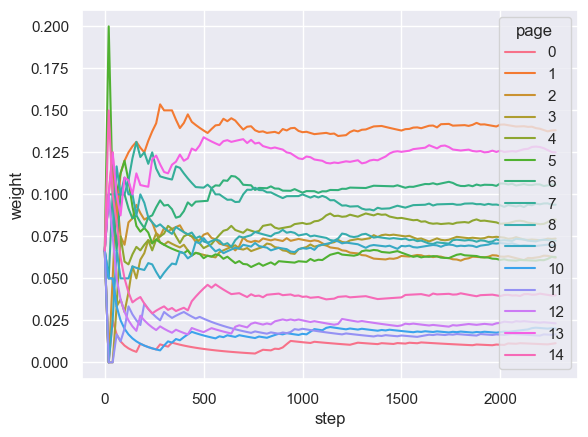

In [37]:
random.seed(1)
np.random.seed(1)

def distance(vec_1: np.ndarray, vec_2: np.ndarray) -> np.float64:
    """
    Compute the eucledian distance between two vectors.
    
    :param vec_1: first vector
    :param vec_2: second vector
    :return: euclidean distance between the vectors
    """
    return np.linalg.norm(vec_1 - vec_2)

def random_walk(transition_matrix: np.ndarray, weight_update_interval: int = 20,
                epsilon: float = 0.001, num_pages: int = 15) -> pd.DataFrame:
    """
    Execute the random walk.
    
    :param transition_matrix: transition matrix
    :param weight_update_interval: number of walking steps between weight updates
    :param epsilon: convergence threshold
    :param num_pages: number of webpages
    :return: dataframe of weights for different pages at different steps
    """
    walk: pd.DataFrame = pd.DataFrame({})

    # Initialize counts and results list
    counts = np.zeros(num_pages)
    results = []

    # Start from a random page
    current_page = np.random.choice(num_pages)
    step = 0

    # Initialize weights with uniform distribution and store initial weights
    initial_weights = np.full(num_pages, 1/num_pages)
    results.extend([{'weight': initial_weights[i], 'step': step, 'page': str(i)} for i in range(num_pages)])

    # Main loop of the random walk
    while True:
        # Walk to the next page and increment step
        current_page = np.random.choice(num_pages, p=transition_matrix[current_page])
        step += 1
        counts[current_page] += 1

        # Update weights and check for convergence at specified intervals
        if step % weight_update_interval == 0:
            new_weights = counts / counts.sum()
            results.extend([{'weight': new_weights[i], 'step': step, 'page': str(i)} for i in range(num_pages)])
            
            # Check for convergence
            if step > weight_update_interval and distance(new_weights, initial_weights) < epsilon:
                break

            initial_weights = new_weights

    # Convert results to DataFrame
    walk = pd.DataFrame(results)
    return walk
    
pagerank_results = random_walk(transition_matrix, 20, 0.001, 15)

# This plots a graph showing the convergence of the page weights as the random walk progresses
# make sure your data frame has the right format for the graph to make sense
sns.lineplot(data=pagerank_results, x="step", y="weight", hue="page")

In [39]:
# This is for you to check if your function works properly
# The test_transition_matrix is from your self test of the task above
random.seed(1)
np.random.seed(1)
np.sum(true_transition_matrix,1)
test_pagerank_results = random_walk(true_transition_matrix, 20, 0.001, 7)

last_seven = pd.DataFrame({
    "weight": [0.035714, 0.060714, 0.046429, 0.052976, 0.694048, 0.051786, 0.058333],
    "step": [1680,1680,1680,1680,1680,1680,1680],
    "page": ["0","1","2","3","4","5","6"]
}, index=[588,589,590,591,592,593,594])

# Here is a test for you
assert test_pagerank_results.iloc[-7:].round(6).equals(last_seven)


In [ ]:
# Hidden test cell, don’t modify

__g) Save all webpages and their final weights ranked by their final weights (highest-ranked webpage first) in the variable `ordered_webpages` as a pandas dataframe.__ (1P)

In [40]:
ordered_webpages = pd.DataFrame(columns=['weight', 'step', 'page'])
final_step = pagerank_results['step'].max()
final_weights = pagerank_results[pagerank_results['step'] == final_step]
ordered_webpages = final_weights.sort_values(by='weight', ascending=False)
ordered_webpages.reset_index(drop=True, inplace=True)

In [ ]:
# Hidden test cell, don’t modify

In [ ]:
# Hidden test cell, don’t modify

## Task 2: Clustering (8 Points)

In this task, you will find clusters of similar arguments for a variety of topics.

__About the data__:

The data for this task is stored in `topic_arguments.tsv`.,Each row contains a `topic` identifier, two arguments `argument_1` and `argument_2`, and a `label` that describes the similarity between the two arguments.,The dataset contains multiple arguments for each topic.

The labels have the following meanings:

* _NS_: no similarity
* _DTORCD_: different topic or can't decide
* _SS_: some similarity
* _HS_: high similarity

These labels will be used to evaluate how well the clustering works.

### Computing the Clusters (6 Points)

__a) Load the data and lowercase `argument_1` and `argument_2` in each row. Save the lowercased data in the variable `df`. Display the `.head()` of the loaded dataframe.__ (1P)

In [ ]:
df = pd.DataFrame()
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Hidden test cell, don’t modify

__b) Imlement the function `cluster_and_predict(...)`. It should:__

* fit the given `vectorizer` on all _unique_ arguments in the `dataframe` (all topics)
* vectorize all _unique_ arguments of the specified `topic` using this `vectorizer`
* fit the given `clustering_model` on these computed vectors
* output the cluster for each argument of the specified `topic`

The output should map each argument to a cluster id as shown below:

```python
{
    "This is one argument": 1,
    "This is a similar argument": 1,
    "This is another very different argument.": 2
}
```

where `1` and `2` are the cluster ids (assigned by the clustering algorithm).


__Apply the function using:__

* a `TfidfVectorizer()` as the `vectorizer`
* an `AgglomerativeClustering(n_clusters=None, distance_threshold=0.8, affinity='cosine', linkage='average')` as the `clustering_model`
* `'Solar energy'` as the `topic`

__and evaluate it using the provided evaluation method.__

__Hint:__ Use the attribute `.labels_` of the clustering model. (3.5P)

In [ ]:
def cluster_and_predict(df: pd.DataFrame, vectorizer: TfidfVectorizer,
                        clustering_model: AgglomerativeClustering, topic: str ) -> dict:
    """
    Cluster all unique arguments from all of (argument_1 | argument_2) and output the cluster mappings.
    
    :param df: dataframe (as loaded)
    :param vectorizer: vectorizer from sklearn
    :param clustering_model: clustering algorithm from sklearn
    :param topic: only arguments from this topic will be clustered
    :return: mappings from arguments to cluster ids
    """
    clusters: dict = {}
    
    # YOUR CODE HERE
    raise NotImplementedError()
    return clusters


def evaluate(df: pd.DataFrame, predictions: Mapping[str, int], topic: str = "Solar energy") -> Tuple[float, float, float]:
    """
    Evaluate the found clusters for a single topic using the similarity labels
    
    :param df: dataframe (as loaded)
    :param predictions: mappings from arguments to cluster ids from cluster_and_predict(...)
    :param topic: only argument pairs from this topic will be considered
    :return: f_mean (mean of f1(sim) and f1(dissim))
    """
    print("number of predictions:", len(predictions))
    
    def to_binary_label(label):
        if label in ["HS", "SS"]:
            return 1
        else:
            return 0
    
    y_true = []
    y_pred = []
    for ix, row in df[df["topic"] == topic].iterrows():
        if row["argument_1"] not in predictions or row["argument_2"] not in predictions:
            raise ValueError("Make sure that all arguments from the topic also exist in the predictions.")
        
        y_true.append(to_binary_label(row["label"]))
        y_pred.append(predictions[row["argument_1"]] == predictions[row["argument_2"]])
        
    f_sim = f1_score(y_true, y_pred, pos_label=1)
    f_dissim = f1_score(y_true, y_pred, pos_label=0)
    f_mean = np.mean([f_sim, f_dissim])
    
    print(f"F_sim: {f_sim}, F_dissim: {f_dissim}, F_mean: {f_mean}")
    return f_mean, f_sim, f_dissim

clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=0.8, affinity="cosine", linkage="average")
clusters = cluster_and_predict(df, TfidfVectorizer(), clustering_model, "Solar energy")
evaluate(df, clusters, "Solar energy")



In [ ]:
## Tests
clustertest = cluster_and_predict(df, TfidfVectorizer(), clustering_model, "Social networks")
test1 = evaluate(df, clustertest, "Social networks")
assert(test1 == (0.6587155963302752, 0.39999999999999997, 0.9174311926605504))

In [ ]:
# Hidden test cell, don’t modify

__c) Run a search over all `distance_thresholds` in `np.linspace(0.7, 1.0, 13)` (leave all other parameters as set in 2b) to find the best value for `distance_threshold` (based on f_mean) for the topic `'Solar energy'`.__

__What is the best `distance_threshold` (save in variable `best_threshold`) and the `f_mean` (save in variable `best_f_mean`) it achieves and what is the corresponding cluster prediction from `cluster_and_predict` to those two best values?__ (1.5P)

*HINT:* Use `affinity='cosine'` and `linkage='average'` parameters in `AgglomerativeClustering` for the clustering model.

In [ ]:
best_f_mean: float = -1
best_threshold: float = None
best_clusters: dict = None

def distance_threshold_search(best_f_mean: float, best_threshold: float, best_clusters: dict) -> Tuple[float, float, dict]:
    # YOUR CODE HERE
    raise NotImplementedError()
    return best_f_mean, best_threshold, best_clusters

best_f_mean, best_threshold, best_clusters = distance_threshold_search(best_f_mean, best_threshold, best_clusters)


In [ ]:
# Hidden test cell, don’t modify

In [ ]:
# Hidden test cell, don’t modify

In [ ]:
# Hidden test cell, don’t modify

### Displaying the Clusters (2 Points)

For simplicity, we are only interested in the topic 'Solar energy'. Note that in reality, we would need to evaluate the derived hyperparameters on a different unseen dataset and different topics. To make things easier, we skip this and assume we have found a general clustering method.

__d) Implement the function `to_ordered_clusters(...)`.,Based on the output of `cluster_and_predict(...)`, it should:__

* create a list that contains a list of unique arguments for each cluster:
```python
[
    ["something about the sun.", "something else about the sun"], # first cluster arguments
    ["something about energy consumption", "..."], # second cluster arguments
    # ...
]
```
* remove all clusters that contain less than `min_arguments=3` unique arguments
* sort all clusters based on the number of unique arguments they contain (with the cluster that contains the most arguments first)

__Apply it on the clusters of the topic 'Solar energy' based on the best `distance_threshold` you found in 2c). If you did not solve 2c), you can choose use the same parameters as in 2b).__

__Use the output of `to_ordered_clusters(...)` as the input for the already implemented function `print_keywords(...)` to display the top `k=10` keywords for each cluster of the topic 'Solar energy'.__ (2P)

In [ ]:
def to_ordered_clusters(predictions: Mapping[str, int], min_arguments: int = 3) -> List[List[str]]:
    """
    Returns a sorted list of lists of arguments of all clusters that have more than min_arguments arguments.
    
    :param predictions: mappings from arguments to cluster ids
    :param min_arguments: minimum number of arguments a cluster must have to not be filtered out
    :return: list of lists of arguments
    """
    ordered_clusters: List[List[str]] = []
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return ordered_clusters
    
def print_keywords(clusters: list[list[str]], k: int = 10) -> None:
    """
    Print the top k words (based on tf-idf weight) for each cluster.
    
    :param clusters: list of lists of arguments
    :param k: number of keywords to print
    """
    
    clusters_merged = [" ".join(arguments) for arguments in clusters]
    vectorizer = TfidfVectorizer(stop_words='english')
    features = vectorizer.fit_transform(clusters_merged).toarray()
    
    # sort by tf-idf value and extract token ids with the highest score
    sorted_features = np.argsort(features)
    top_sorted_features = sorted_features[:,-k:]
    
    for cluster_idx in range(top_sorted_features.shape[0]):
        print(f"Cluster #{cluster_idx} ({len(clusters[cluster_idx])} arguments)")
        for idx in top_sorted_features[cluster_idx,::-1]:
            if features[cluster_idx,idx] > 0:
                print("*", vectorizer.get_feature_names_out()[idx])
        print("---\n")

print_keywords(to_ordered_clusters(best_clusters)) 

In [ ]:
#Test
temp = to_ordered_clusters(best_clusters)
assert(len(temp) == 6)

In [ ]:
# Hidden test cell, don’t modify

**Submission:**

Please upload your submission to Moodle before the next exercise session <font color="red">(Jan 10, 23:59pm)</font>!

Submission format: `Group_XX_Exercise_XX.zip`

Your submission should contain your filled out Jupyter notebook (naming schema: `NLP4Web_Home_Exercise4.ipynb`) and any auxiliar files that are necessary to run your code (e.g., the datasets provided by us).

Each submission must be handed in only once per group. If the naming of the file and the zip is not correct, points will be deducted.